## AutoML con Python y h2o
### Ivonne Yanez Mendoza
### Master en big data & business analytics
### Universidad complutense de Madrid



In [2]:
# Instalacion de libreria h2o
!pip install -U h2o

  Using cached h2o-3.40.0.1-py2.py3-none-any.whl (177.7 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 KB 14.3 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for future: filename=future-0.18.3-py3-none-any.whl size=492037 sha256=48739d85027c2f86a98585bacce076ba8a7e04f04205c134bd428aa6307caedd
  Stored in directory: /Users/ivonne.mendoza/Library/Caches/pip/wheels/a0/0b/ee/e6994fadb42c1354dcccb139b0bf2795271bddfe6253ccdf11
Successfully built future


In [61]:
# Imports
import h2o
import matplotlib as plt
%matplotlib inline
from h2o.automl import H2OAutoML
from h2o.automl import get_leaderboard


In [62]:
# Setting de los threads a utilizar
h2o.init(nthreads=8)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,23 mins 13 secs
H2O_cluster_timezone:,Europe/Amsterdam
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_ivonne_mendoza_168b5x
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.502 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [63]:
# Lectura del archivo superstore
dataset = h2o.import_file("superstore_clean.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [64]:
# C1 es el numero de fila
dataset.head()

Education_Graduation,Education_PhD,Education_Master,Education_Basic,Marital_Status_Divorced,Marital_Status_Single,Marital_Status_Married,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Edad,Dt_Customer_year,tiempo_participacion
1,0,0,0,1,0,0,84835,0,0,0,189,104,379,111,189,218,1,4,4,6,1,1,0,53,2014,9
1,0,0,0,0,1,0,57091,0,0,0,464,5,64,7,0,37,1,7,3,7,5,1,0,62,2014,9
1,0,0,0,0,0,1,67267,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,65,2014,9
1,0,0,0,0,0,1,32474,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,56,2014,9
1,0,0,0,0,1,0,21474,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,34,2014,9
0,1,0,0,0,1,0,71691,0,0,0,336,130,411,240,32,43,1,4,7,5,2,1,0,65,2014,9
0,0,1,0,0,0,1,63564,0,0,0,769,80,252,15,34,65,1,10,10,7,6,1,0,69,2014,9
1,0,0,0,0,0,1,44931,0,1,0,78,0,11,0,0,7,1,2,1,3,5,0,0,56,2014,9
0,1,0,0,0,0,1,65324,0,1,0,384,0,102,21,32,5,3,6,2,9,4,0,0,69,2014,9
0,1,0,0,0,0,1,65324,0,1,0,384,0,102,21,32,5,3,6,2,9,4,0,0,69,2014,9


In [65]:
# 
dataset.describe()

Rows:2236
Cols:27

,Education_Graduation,Education_PhD,Education_Master,Education_Basic,Marital_Status_Divorced,Marital_Status_Single,Marital_Status_Married,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Edad,Dt_Customer_year,tiempo_participacion
type,int,int,int,int,int,int,int,real,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int
mins,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1730.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,2012.0,9.0
mean,0.5035778175313059,0.2169051878354204,0.25536672629695883,0.024150268336314847,0.10330948121645796,0.25178890876565296,0.644901610017889,51961.79202035945,0.44409660107334525,0.5067084078711985,49.11627906976744,304.12745974955277,26.275939177101968,165.4892665474061,37.53622540250447,27.022808586762075,43.87567084078712,2.3197674418604652,4.061717352415027,2.6355098389982112,5.795617173524151,5.318872987477639,0.14937388193202147,0.008944543828264758,54.10196779964222,2013.0277280858677,9.97227191413238
maxs,1.0,1.0,1.0,1.0,1.0,1.0,1.0,162397.0,2.0,2.0,99.0,1493.0,199.0,984.0,259.0,198.0,249.0,13.0,11.0,11.0,13.0,20.0,1.0,1.0,83.0,2014.0,11.0
sigma,0.500099040508539,0.41222970068843157,0.43616469565750376,0.15354991829800477,0.3044307482250703,0.43413770347339475,0.47865017062653087,21411.403312631366,0.5384591801154796,0.5446092841940859,28.957283725077065,336.5918104083812,39.724007277100185,217.9077989271777,54.64856222994097,41.01453791887597,51.55062860327866,1.8948141024399372,2.643423565298977,2.7647461476961475,3.251129354513063,2.426885536008998,0.35653636004400024,0.09417274128240043,11.70328069917982,0.6848572602880347,0.6848572602880255
zeros,1110,1751,1665,2182,2005,1673,794,0,1291,1155,28,13,399,1,384,418,61,46,49,585,15,11,1902,2216,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,84835.0,0.0,0.0,0.0,189.0,104.0,379.0,111.0,189.0,218.0,1.0,4.0,4.0,6.0,1.0,1.0,0.0,53.0,2014.0,9.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,57091.0,0.0,0.0,0.0,464.0,5.0,64.0,7.0,0.0,37.0,1.0,7.0,3.0,7.0,5.0,1.0,0.0,62.0,2014.0,9.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,67267.0,0.0,1.0,0.0,134.0,11.0,59.0,15.0,2.0,30.0,1.0,3.0,2.0,5.0,2.0,0.0,0.0,65.0,2014.0,9.0


In [66]:
# Exploracion de la variable objetivo
dataset["Response"].table()

Response,Count
0,1902
1,334


In [67]:
dataset["Response"] = dataset["Response"].asfactor()

In [68]:
# Split the data into Train/Test/Validation with Train having 70% and test and validation 15% each
train,test = dataset.split_frame(ratios=[.85])

In [69]:
test.shape

(346, 27)

In [70]:
# train = dataset

In [71]:
list(train.columns)

['Education_Graduation',
 'Education_PhD',
 'Education_Master',
 'Education_Basic',
 'Marital_Status_Divorced',
 'Marital_Status_Single',
 'Marital_Status_Married',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Response',
 'Complain',
 'Edad',
 'Dt_Customer_year',
 'tiempo_participacion']

In [72]:
# Se seleccionan las variables independientes y dependientes
predictors = ['Education_Graduation',
 'Education_PhD',
 'Education_Master',
 'Education_Basic',
 'Marital_Status_Divorced',
 'Marital_Status_Single',
 'Marital_Status_Married',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Response',
 'Complain',
 'Edad',
 'Dt_Customer_year',
 'tiempo_participacion']
response = "Response"

In [73]:
aml = H2OAutoML(max_models=10, max_runtime_secs_per_model=30, seed=623, project_name='classification', sort_metric = "AUC",
                nfolds=5, keep_cross_validation_predictions=True, exclude_algos=["StackedEnsemble"])


In [74]:
# Entrenamiento del modelo
%time aml.train(x=predictors, y=response, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
CPU times: user 456 ms, sys: 67.6 ms, total: 523 ms
Wall time: 14.6 s


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_5_20230301_123432


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    63                 63                          12885                  4            10           6.98413       10            13            11.5873

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.06544458497832036
RMSE: 0.25582139273000676
LogLoss: 0.21832459825540912
Mean Per-Class Error: 0.12019384385983597
AUC: 0.9547820832454826
AUCPR: 0.7932073480088063
Gini: 0.9095641664909653

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2776400518141337
       0     1    Error    Rate
-----  ----  ---  -------  --------------
0      1469  134  0.0836   (134.0/1603.0)
1      45    242  0.1568   (45.0/287.0)
Total  1514  376  0.0947   (179.0/1890.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.27764      0.730015  181
max f2                       0.244239     0.810983  196
max f0point5                 0.51095      0.744681  96
max accuracy                 0.42684      0.912698  120
max precision                0.823185     1         0
max recall                   0.0617629    1         320
max specificity              0.823185     1         0
max absolute_mcc             0.253641     0.683318  192
max min_per_class_accuracy   0.239644     0.888502  199
max mean_per_class_accuracy  0.159693     0.891552  244
max tns                      0.823185     1603      0
max fns                      0.823185     285       0
max fps                      0.00274273   1603      399
max tps                      0.0617629    287       320
max tnr                      0.823185     1         0
max fnr                      0.823185     0.993031  0
max fpr                      0.00274273   1         399
max tpr                      0.0617629    1         320

Gains/Lift Table: Avg response rate: 15.19 %, avg score: 15.39 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100529                   0.765516           6.23877    6.23877            0.947368         0.798066    0.947368                    0.798066            0.0627178       0.0627178                  523.877   523.877            0.0620939
2        0.0201058                   0.726388           6.58537    6.41207            1                0.745636    0.973684                    0.771851            0.0662021       0.12892                    558.537   541.207            0.128296
3        0.0301587                   0.677499           6.23877    6.3543             0.947368         0.70115     0.964912                    0.748284            0.0627178       0.191638                   523.877   535.43             0.19039
4        0.0407407                   0.643445           5.59756    6.15774            0.85             0.65901     0.935065                    0.725096            0.0592334       0.250871                   459.756   515.774            0.247752
5        0.0502646                   0.61824            6.21951    6.16945            0.944444         0.629954    0.936842                    

In [76]:
lb2 = aml.leaderboard
lb2.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_1_AutoML_5_20230301_123432,0.8782,0.292685,0.537026,0.227158,0.303223,0.0919442
GBM_3_AutoML_5_20230301_123432,0.876221,0.298385,0.549753,0.248383,0.305039,0.0930485
XGBoost_1_AutoML_5_20230301_123432,0.873154,0.299795,0.528813,0.19589,0.307972,0.0948468
GBM_2_AutoML_5_20230301_123432,0.872919,0.303392,0.544442,0.212125,0.308784,0.0953476
GBM_4_AutoML_5_20230301_123432,0.870082,0.305117,0.526369,0.225781,0.308197,0.0949851
XGBoost_2_AutoML_5_20230301_123432,0.8693,0.306035,0.538296,0.252857,0.309667,0.0958938
XGBoost_3_AutoML_5_20230301_123432,0.867351,0.311628,0.527142,0.221726,0.30981,0.0959824
DRF_1_AutoML_5_20230301_123432,0.867296,0.312915,0.544412,0.236493,0.305376,0.0932546
XRT_1_AutoML_5_20230301_123432,0.861288,0.306666,0.531929,0.248825,0.308165,0.0949658
GLM_1_AutoML_5_20230301_123432,0.846378,0.317912,0.500211,0.268917,0.314953,0.0991952


Una vez procesado el algoritmo, este ha determinado que el mejor modelo es un Xgboost 

In [77]:
modelo1 = h2o.get_model("GBM_1_AutoML_5_20230301_123432")
modelo1

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_5_20230301_123432


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    63                 63                          12885                  4            10           6.98413       10            13            11.5873

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.06544458497832036
RMSE: 0.25582139273000676
LogLoss: 0.21832459825540912
Mean Per-Class Error: 0.12019384385983597
AUC: 0.9547820832454826
AUCPR: 0.7932073480088063
Gini: 0.9095641664909653

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2776400518141337
       0     1    Error    Rate
-----  ----  ---  -------  --------------
0      1469  134  0.0836   (134.0/1603.0)
1      45    242  0.1568   (45.0/287.0)
Total  1514  376  0.0947   (179.0/1890.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.27764      0.730015  181
max f2                       0.244239     0.810983  196
max f0point5                 0.51095      0.744681  96
max accuracy                 0.42684      0.912698  120
max precision                0.823185     1         0
max recall                   0.0617629    1         320
max specificity              0.823185     1         0
max absolute_mcc             0.253641     0.683318  192
max min_per_class_accuracy   0.239644     0.888502  199
max mean_per_class_accuracy  0.159693     0.891552  244
max tns                      0.823185     1603      0
max fns                      0.823185     285       0
max fps                      0.00274273   1603      399
max tps                      0.0617629    287       320
max tnr                      0.823185     1         0
max fnr                      0.823185     0.993031  0
max fpr                      0.00274273   1         399
max tpr                      0.0617629    1         320

Gains/Lift Table: Avg response rate: 15.19 %, avg score: 15.39 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100529                   0.765516           6.23877    6.23877            0.947368         0.798066    0.947368                    0.798066            0.0627178       0.0627178                  523.877   523.877            0.0620939
2        0.0201058                   0.726388           6.58537    6.41207            1                0.745636    0.973684                    0.771851            0.0662021       0.12892                    558.537   541.207            0.128296
3        0.0301587                   0.677499           6.23877    6.3543             0.947368         0.70115     0.964912                    0.748284            0.0627178       0.191638                   523.877   535.43             0.19039
4        0.0407407                   0.643445           5.59756    6.15774            0.85             0.65901     0.935065                    0.725096            0.0592334       0.250871                   459.756   515.774            0.247752
5        0.0502646                   0.61824            6.21951    6.16945            0.944444         0.629954    0.936842                    

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_1_AutoML_5_20230301_123432

,0,1,Error,Rate
0,1469.0,134.0,0.0836,(134.0/1603.0)
1,45.0,242.0,0.1568,(45.0/287.0)
Total,1514.0,376.0,0.0947,(179.0/1890.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

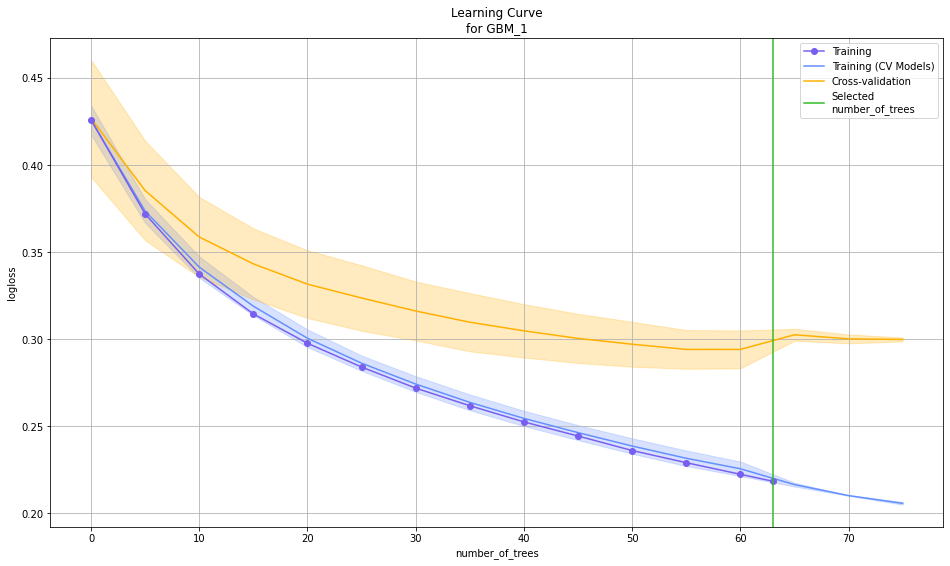

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

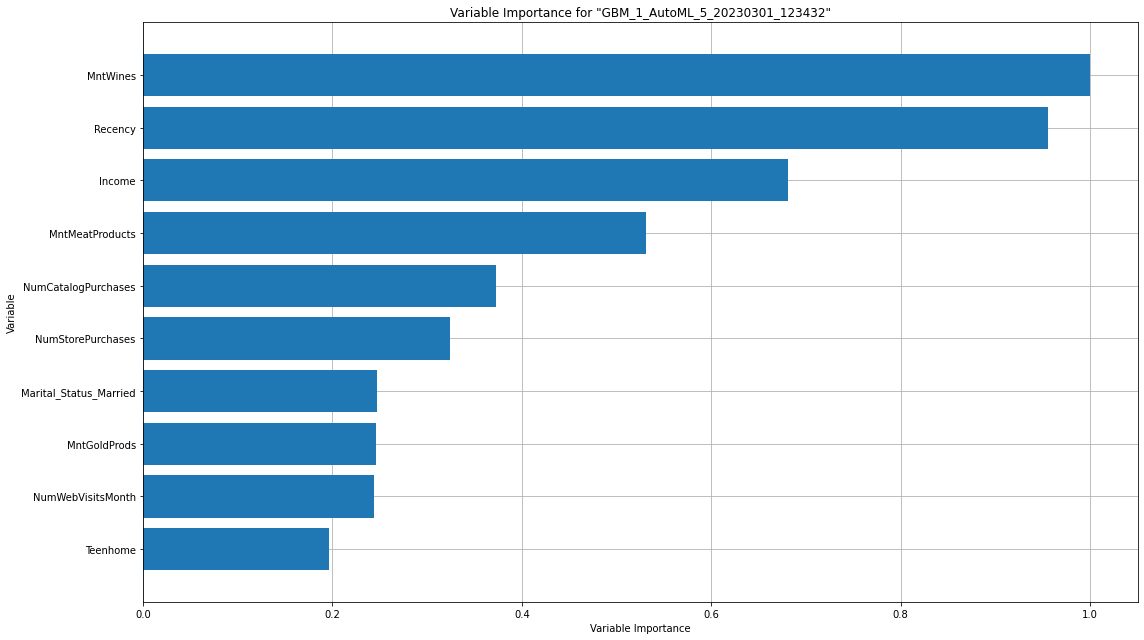

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

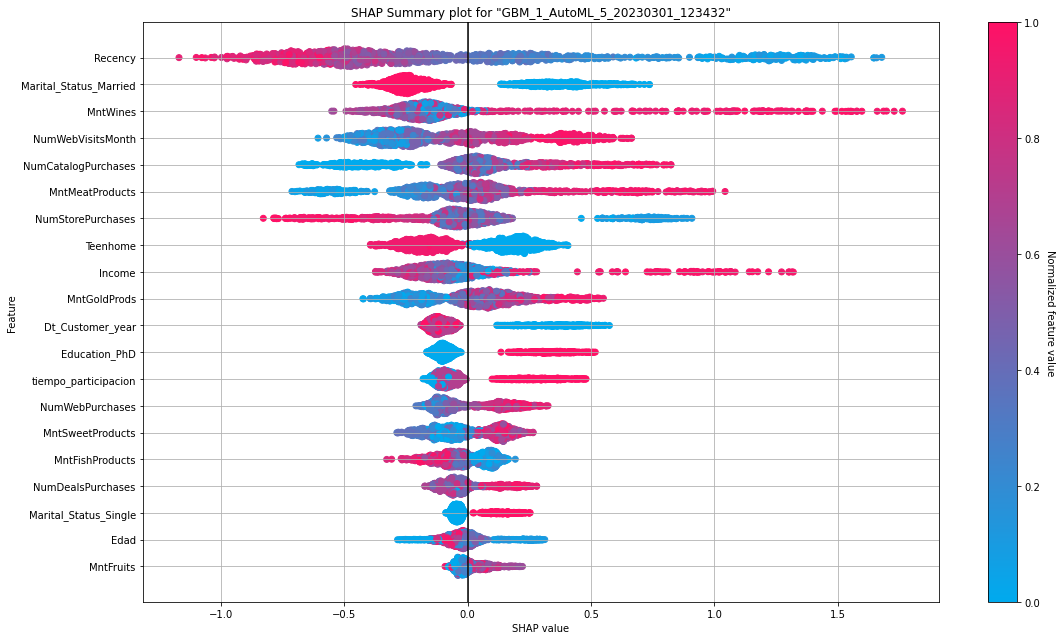

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

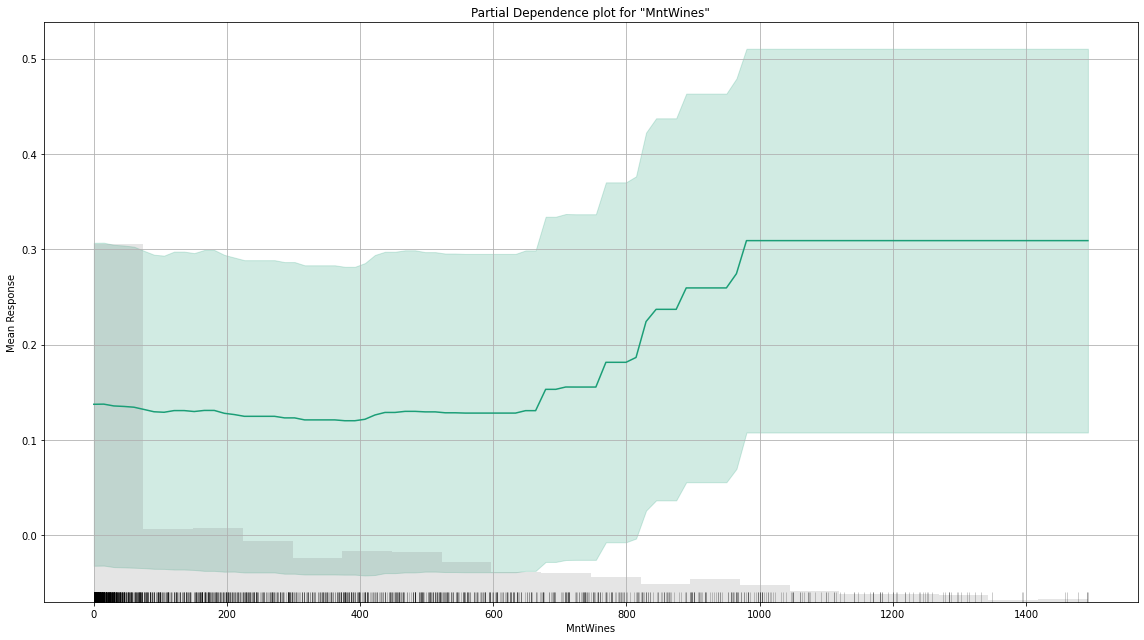

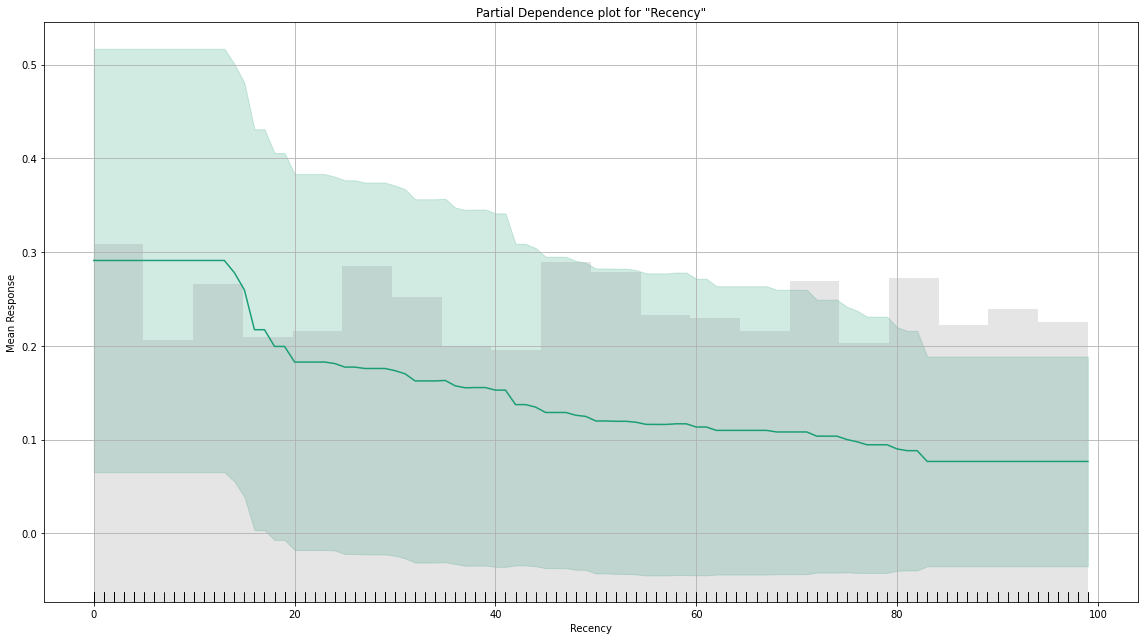

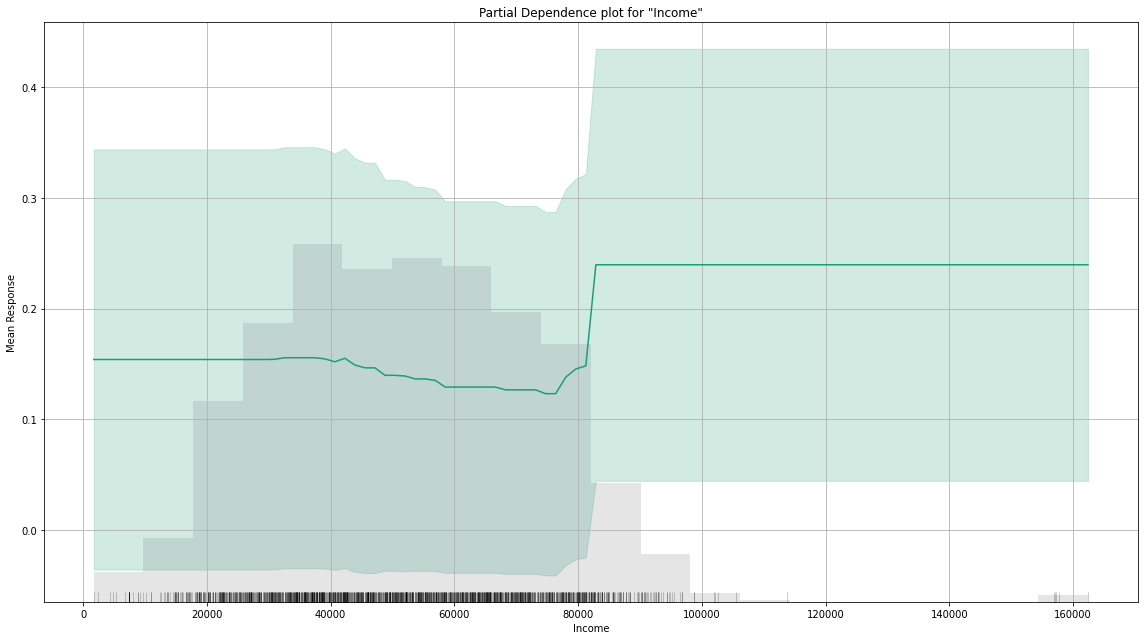

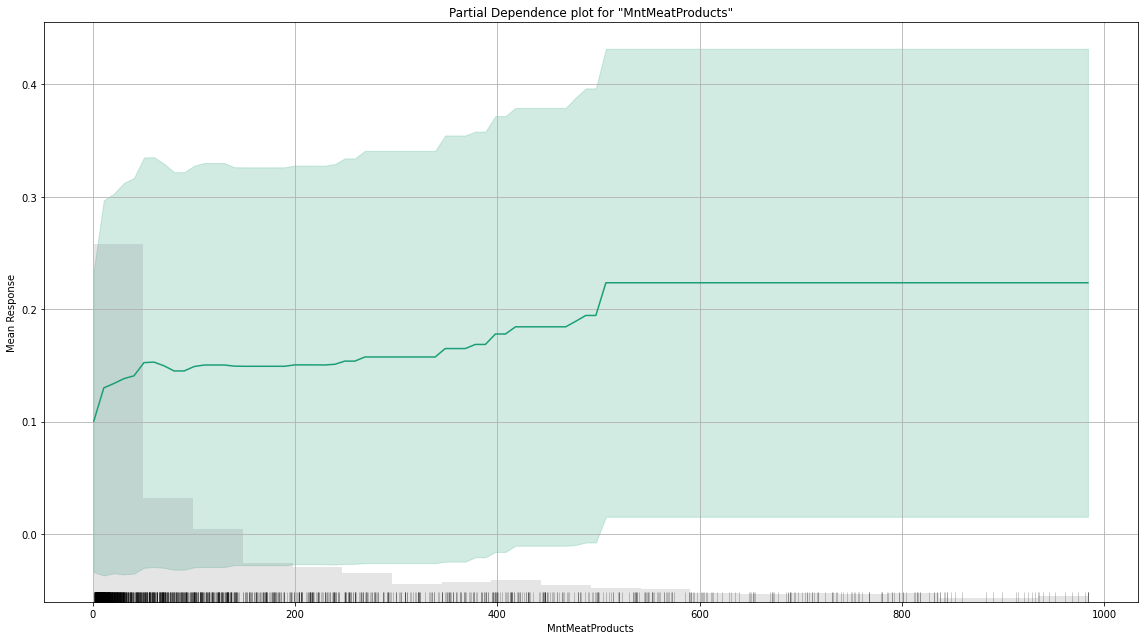

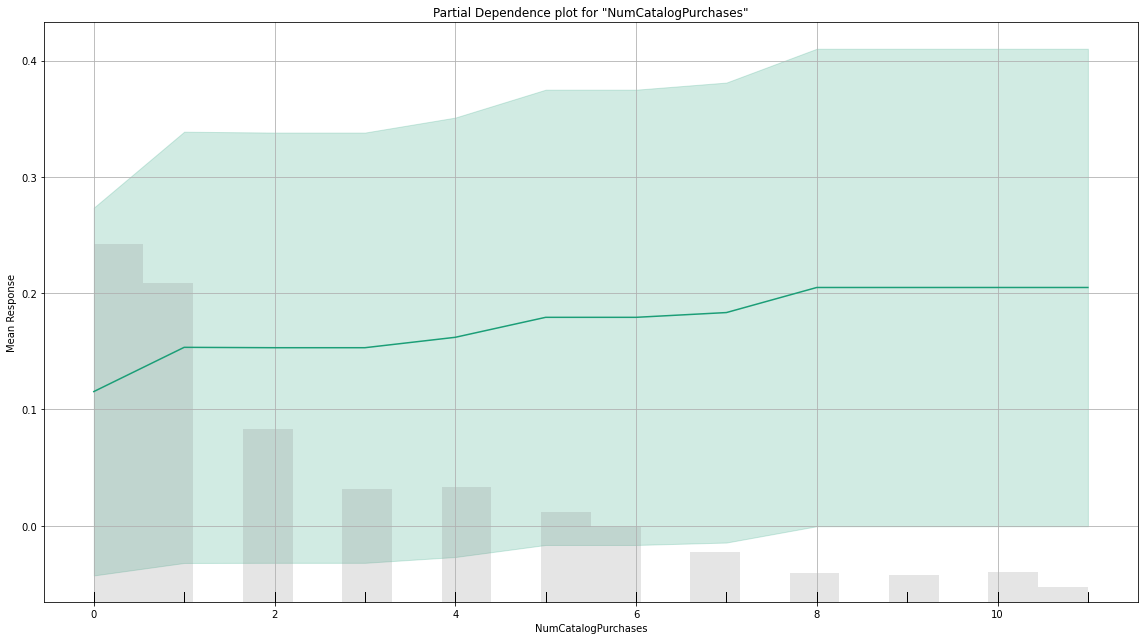

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_1_AutoML_5_20230301_123432

,0,1,Error,Rate
0,1469.0,134.0,0.0836,(134.0/1603.0)
1,45.0,242.0,0.1568,(45.0/287.0)
Total,1514.0,376.0,0.0947,(179.0/1890.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [78]:
modelo1.explain(train)

In [79]:
# Get the best model using the metric
m = aml.leader
# this is equivalent to
m = aml.get_best_model()

# Get the best model using a non-default metric
m = aml.get_best_model(criterion="logloss")

# Get the best XGBoost model using default sort metric
gbm = aml.get_best_model(algorithm="gbm")

# Get the best XGBoost model, ranked by logloss
gbm = aml.get_best_model(algorithm="gbm", criterion="logloss")

In [83]:
# View the parameters for the XGBoost model selected above
gbm.params.keys()

# Inspect individual parameter values
gbm.params['ntrees']

{'default': 50, 'actual': 63, 'input': 10000}

In [59]:
# #Create frame of objects
# h_objects = h2o.ls()
# #Filter for keys of one AutoML session
# filtered_objects = h_objects[h_objects['key'].str.contains('AutoML_YYYYMMDD_xxxxxx')]
# for key in filtered_objects['key']:
#     h2o.remove(key)

In [60]:
# h2o.remove(aml)
